In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
faces_image = np.load('./olivetti_faces.npy')


In [4]:
faces_image.shape

(400, 64, 64)

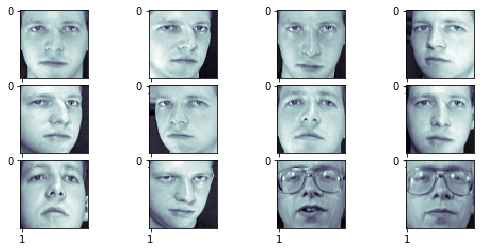

In [48]:
# 先画出空白的12个图像框框
fig, axes = plt.subplots(3,4 ,figsize=(9,4),   #  3 ，4  三横四列   figsize 每个图片的大小    
                        subplot_kw ={'xticks':[1], 'yticks':[0]},       # 每个小图像 xy轴的内容
                         gridspec_kw =dict(hspace=0.1 , wspace=0.1)   # hspcae: 上下图的 间距   wspace 估计是左右吧，但看不出效果
                        )

# 把每个空白的图像框框 放进图片
for  i , ax in enumerate(axes.flat):   #ax 这里大概是代表 那个位置把？～
    ax.imshow(faces_image[i],cmap='bone')  # cmap='bone' 像 x-ray 扫描出来的照片，也可以用其他如viridis 


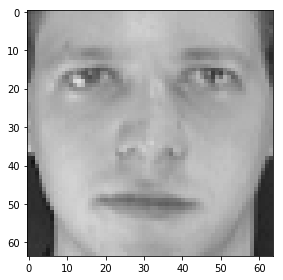

In [53]:
imshow(faces_image[0])

In [54]:
faces_image[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [69]:
# Use PCA to do face dimensionality reduction.
n_components = 200  #选择多少个主成分， 从64*64=4096纬 中 降维到150纬。 不同数字，不同的信息丢失量  自己多试各种参数
def face_pca(faces, n_components):
    
    h = faces.shape[1]
    w = faces.shape[2]
    
    #把二维的拉成一维
    faces_data= faces.reshape(faces.shape[0], h*w)  # f.shape【0】一共多少张人脸   给每张脸赋值一个 一维的向量
    
    pca =PCA(n_components = n_components).fit(faces_data)  #把降到多少维 去fit 这个 数据    
    
    #特征脸
    eigen_faces = pca.components_.reshape((n_components,h,w))  #把每一张特征脸的数据 重新转化为3维的可读的图片
    faces_pca =pca.transform(faces_data)
    return faces_pca, eigen_faces
    
faces_pca, eigen_faces = face_pca(faces_image, n_components)

    

In [70]:
faces_image.size

1638400

In [71]:
eigen_faces.size   #为何从 1638400 降到了819200 这个的浓缩数量标准在哪？  为什么图片数量减少了呢？～

819200

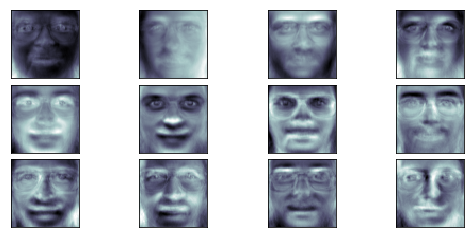

In [73]:
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigen_faces[i], cmap='bone')

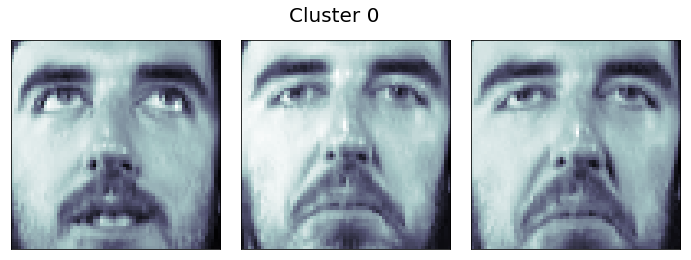

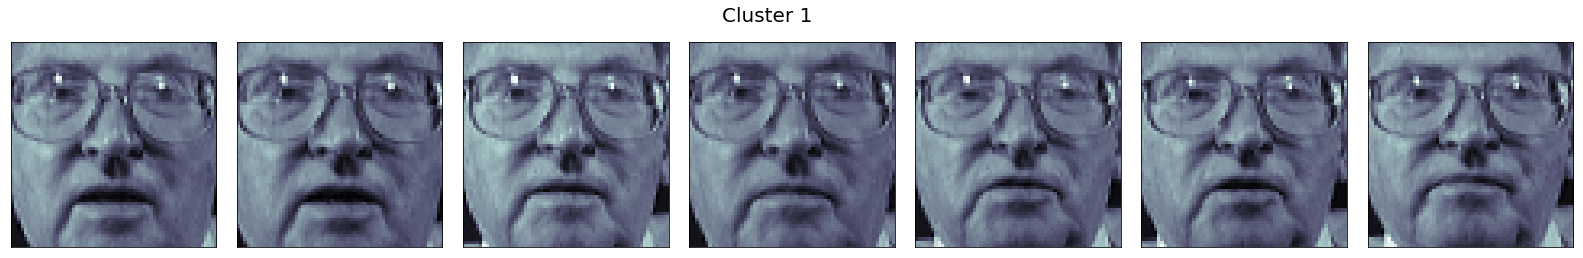

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

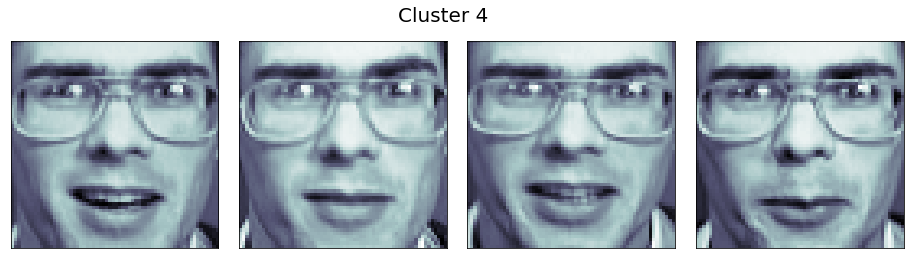

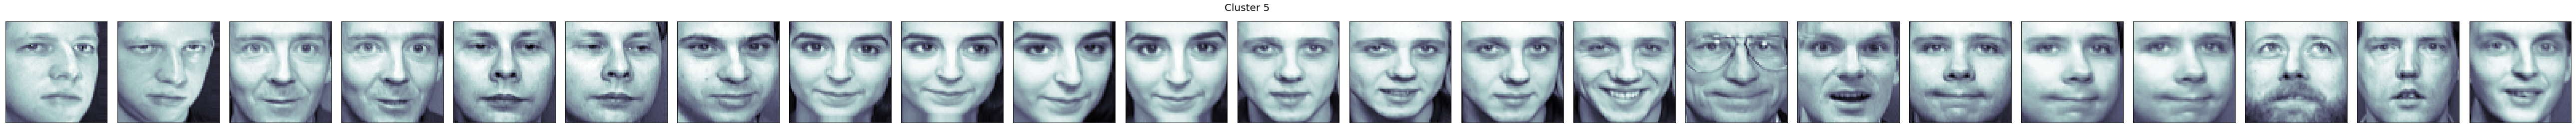

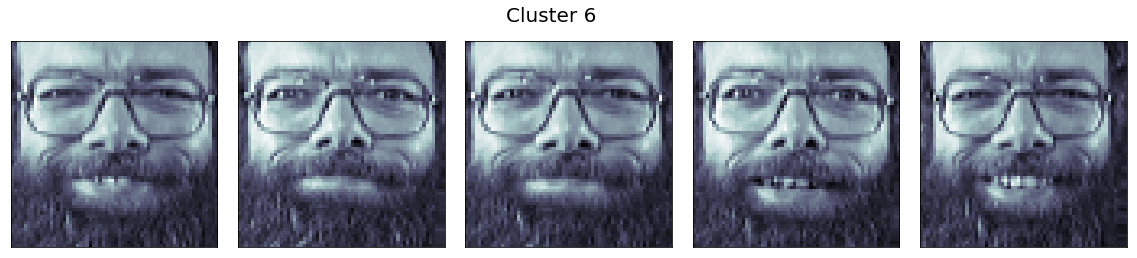

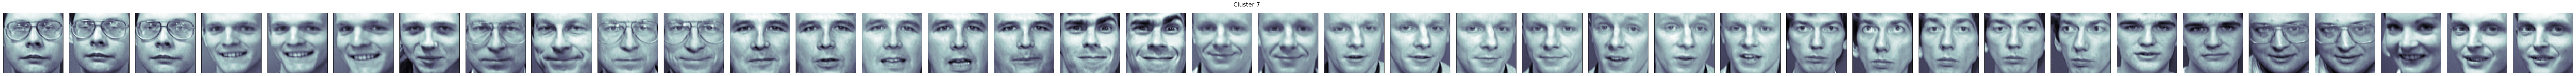

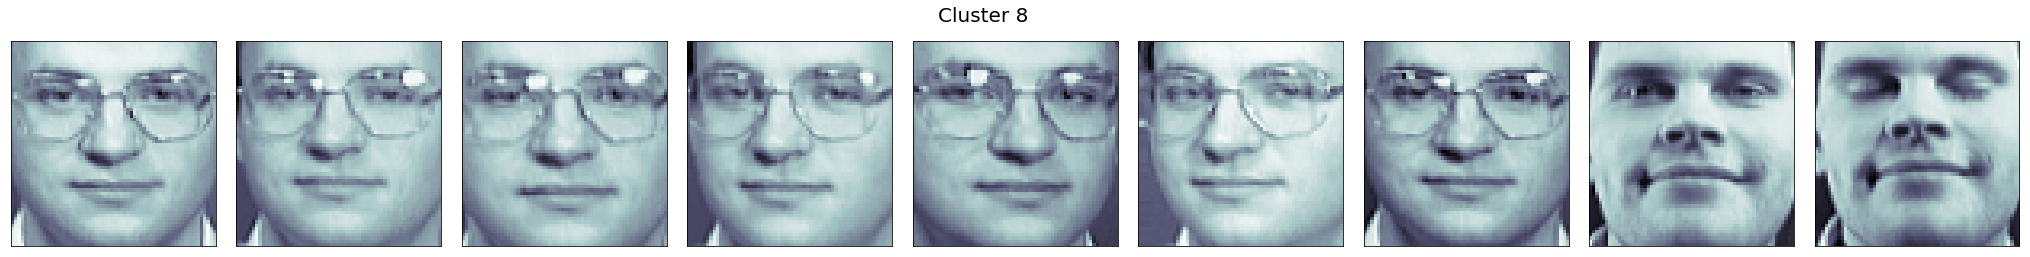

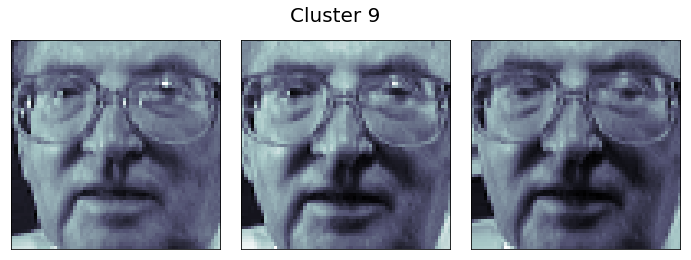

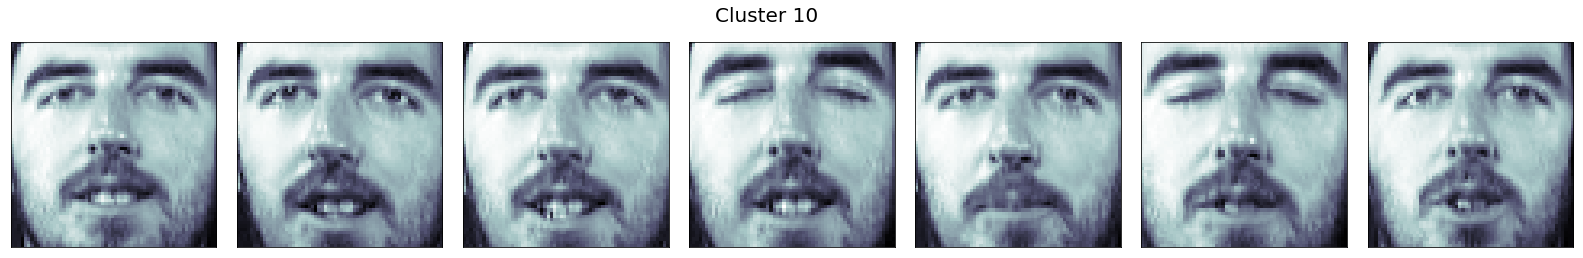

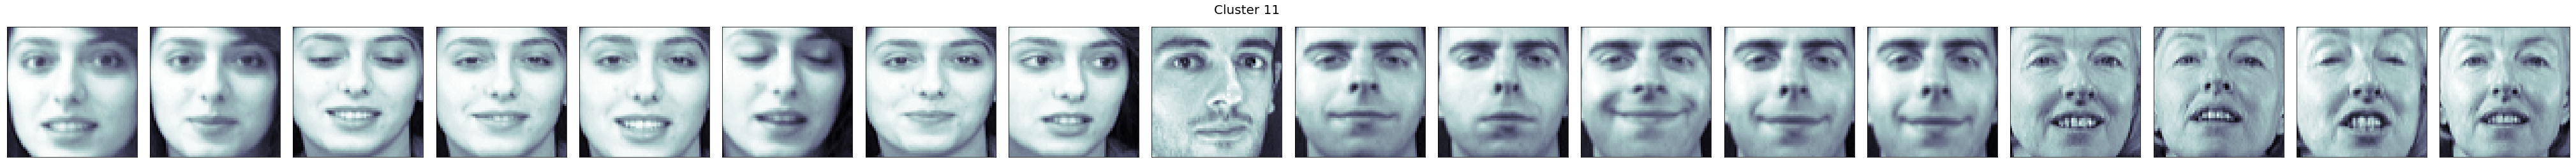

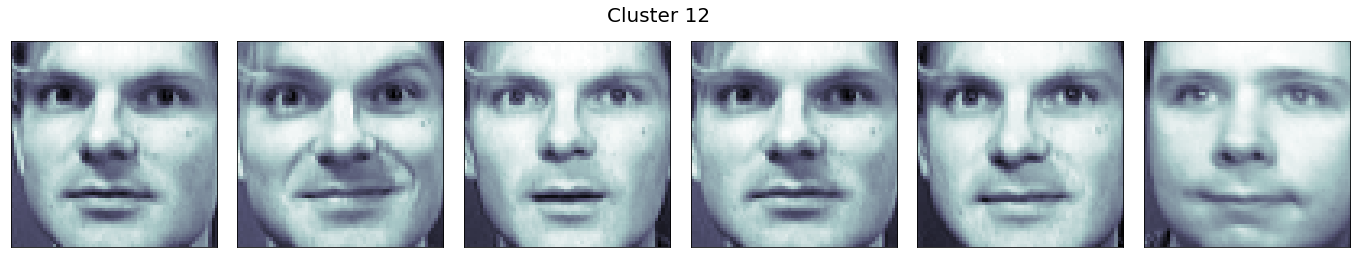

<Figure size 0x288 with 0 Axes>

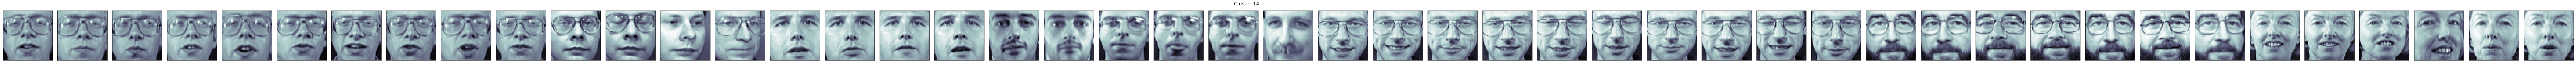

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

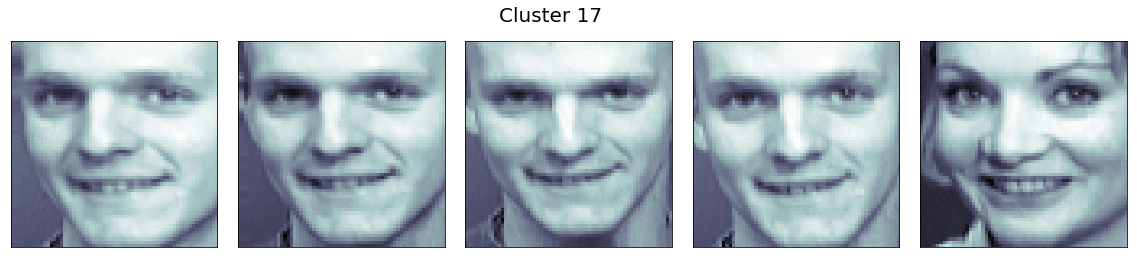

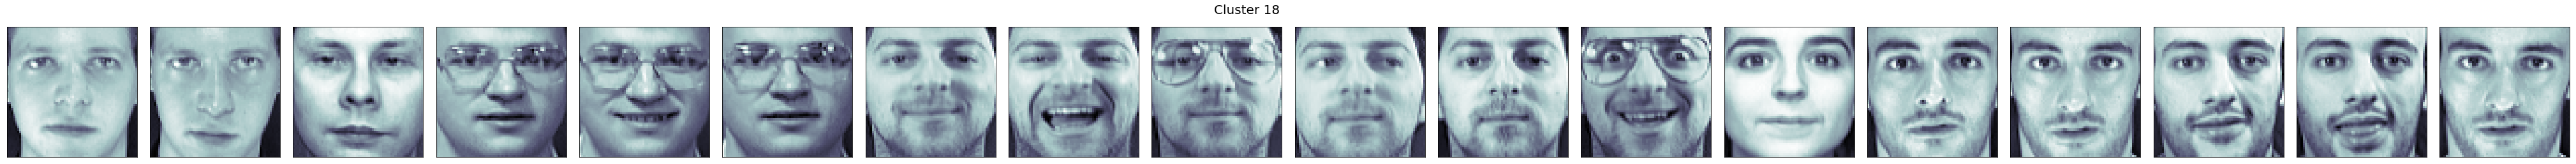

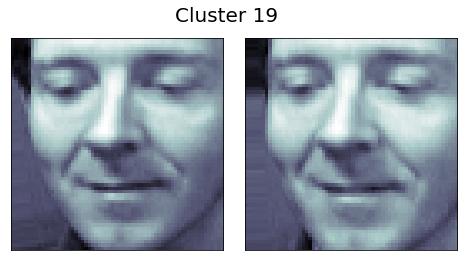

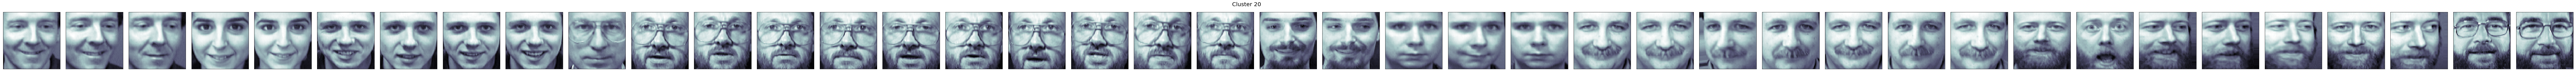

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

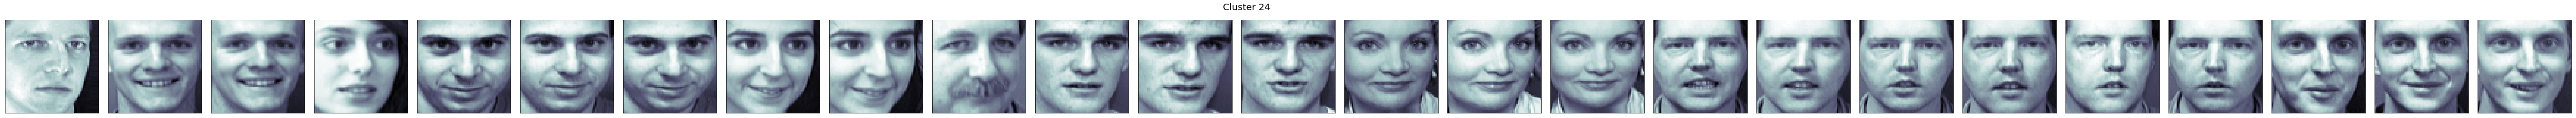

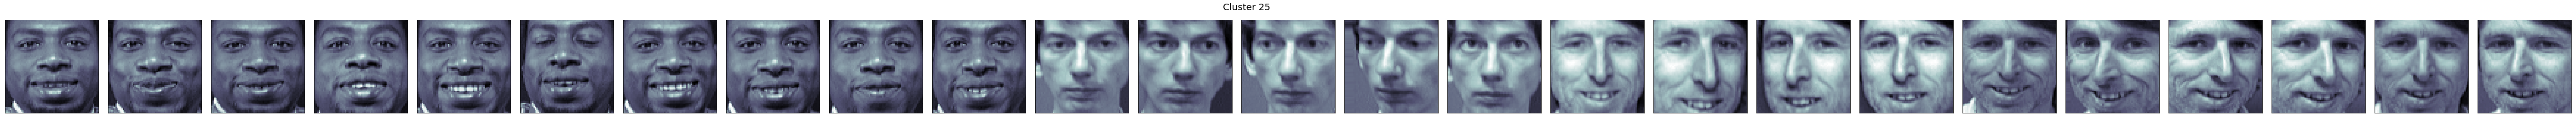

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

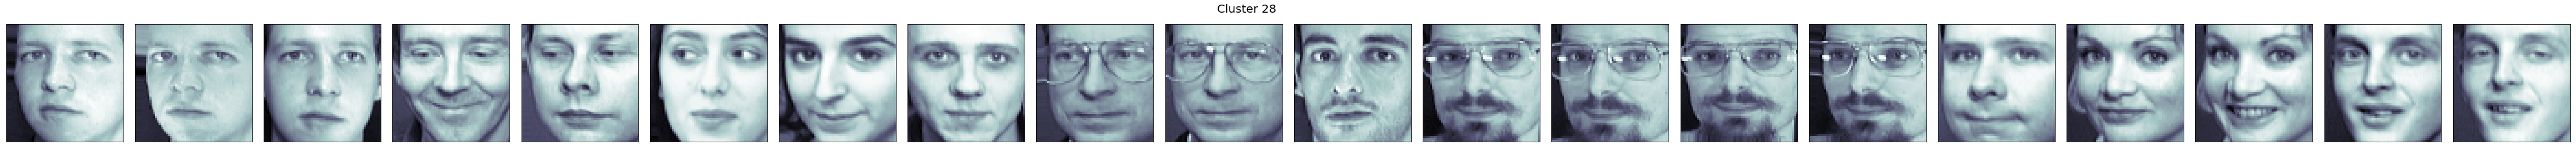

<Figure size 0x288 with 0 Axes>

<Figure size 0x288 with 0 Axes>

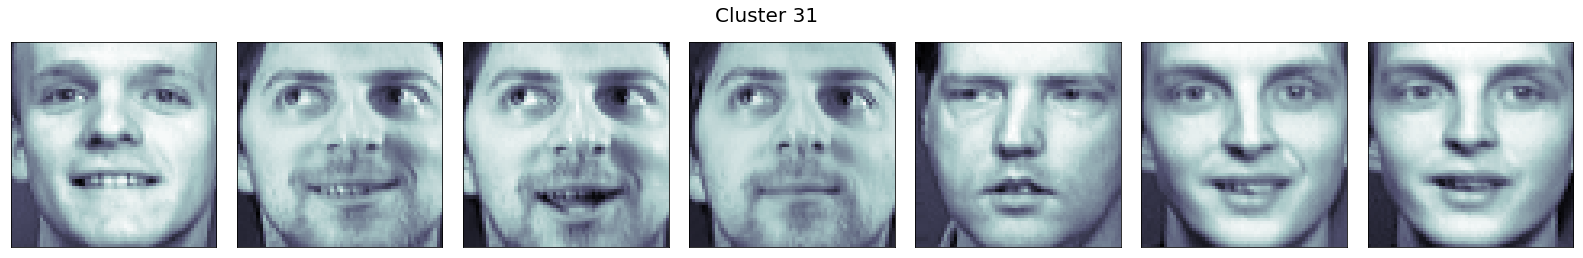

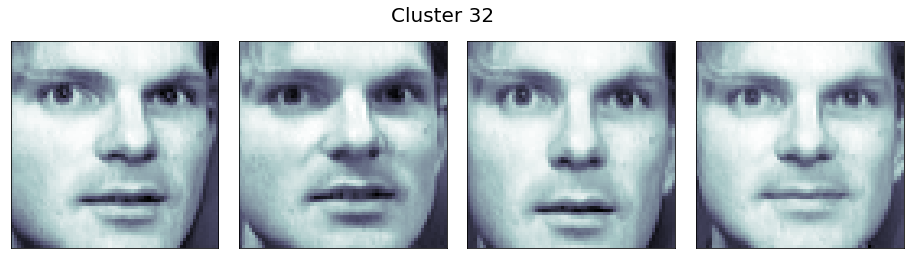

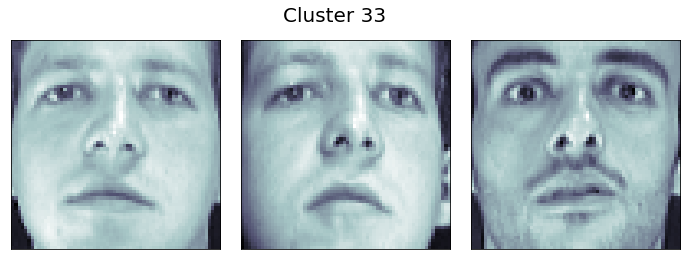

<Figure size 0x288 with 0 Axes>

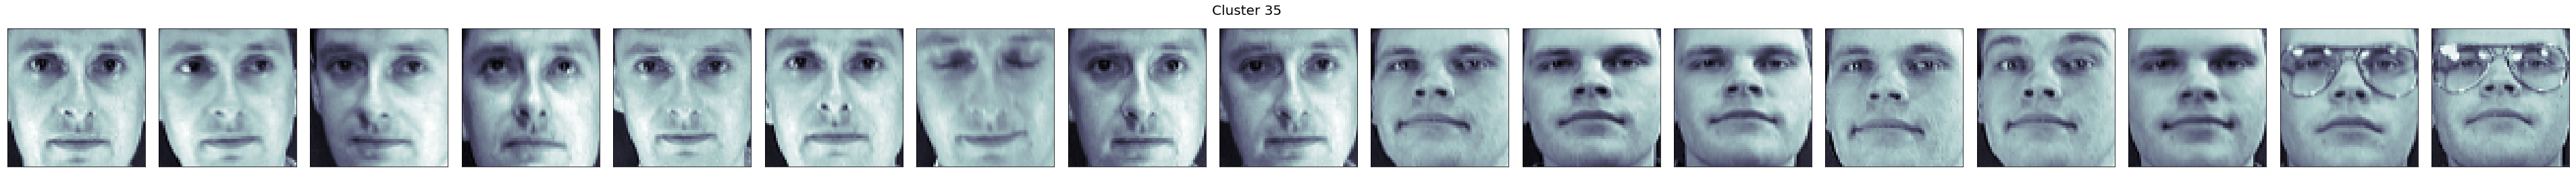

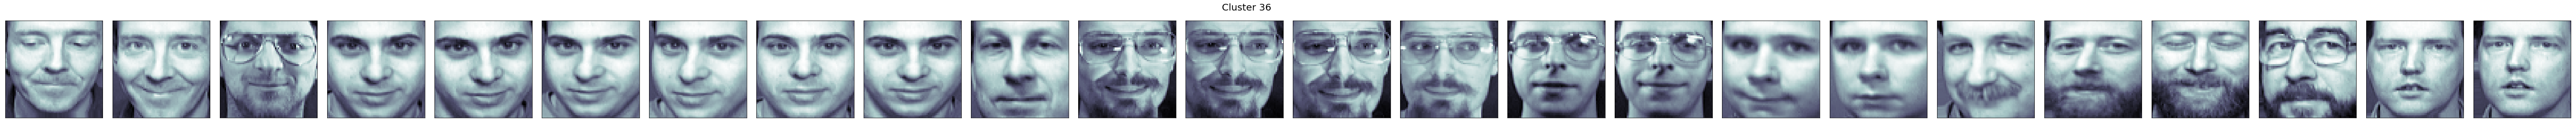

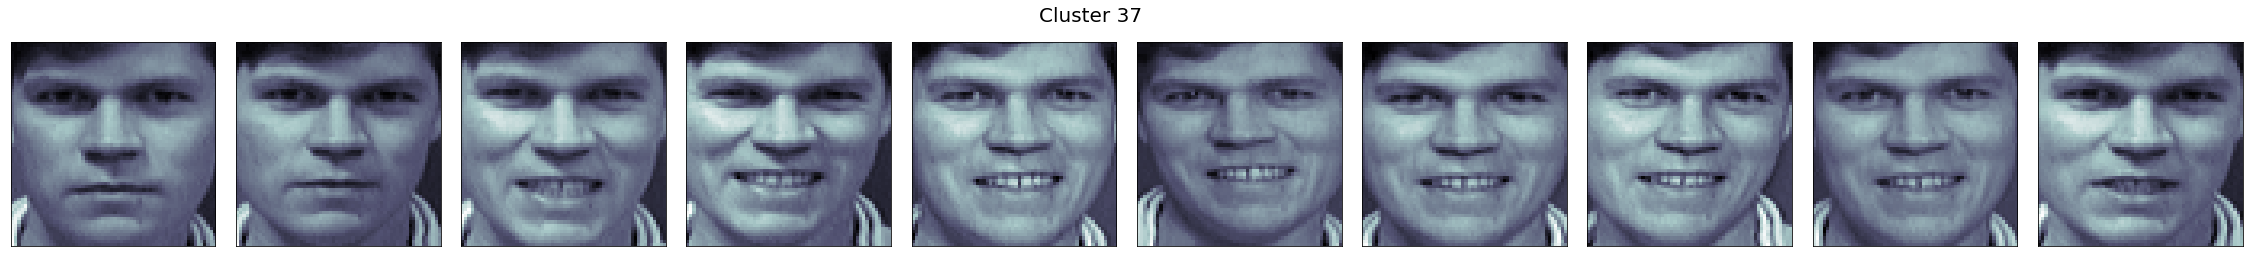

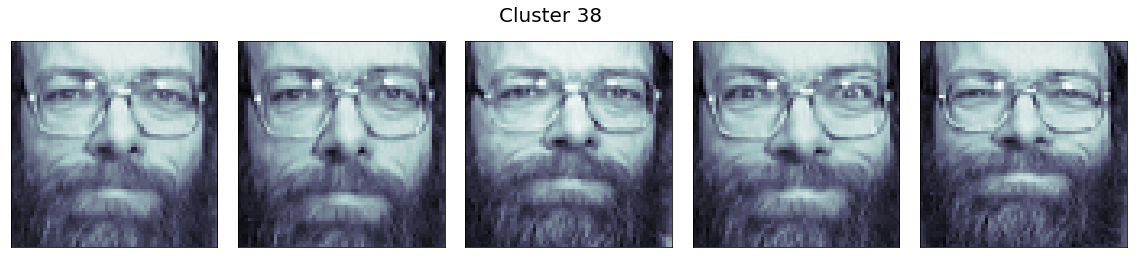

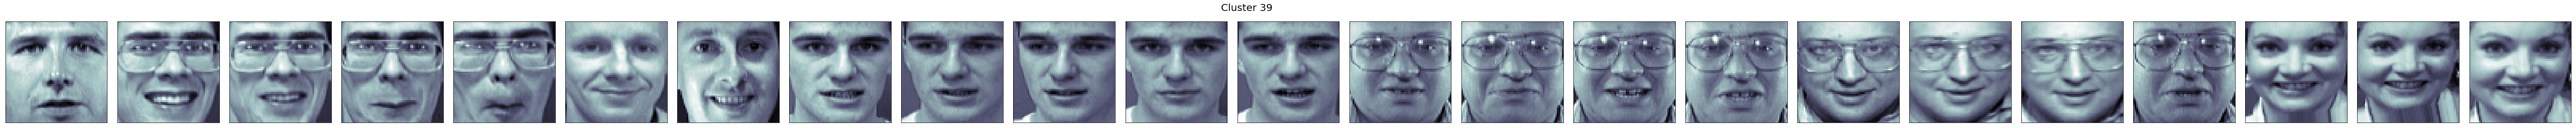

In [74]:
# Implement k-means.
class KMeans():
    def __init__(self, k=40, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        # n * 1 的数组，保存每个样本的 final cluster id
        self.label = None
    
    def _dist(self, a, b):
        '''
        a: 一维数组
        b: 一维数组
        return: 欧几里得距离
        '''
        return np.math.sqrt(sum(np.power(a - b, 2)))
    
    def _randCenter(self, data, k):
        '''
        data: n * m 的样本，其中 n 是样本个数，m 是特征个数
        k: cluster 的个数
        return: 随机选择的 k 个质心
        '''
        m = data.shape[1]
        centers = np.empty((k, m))
        for i in range(m):
            minVal = min(data[:, i])
            maxVal = max(data[:, i])
            centers[:, i] = (minVal + (maxVal - minVal) * np.random.rand(k, 1)).flatten()
        return centers
    
    def fit(self, data):
        '''
        将输入的data进行聚类，并将聚类结果保存在self.label中
        data: n * m 的样本，其中 n 是样本个数，m 是特征个数
        '''
        n = data.shape[0] # 样本个数
        cluster_assign = np.zeros(n) # 样本分配的 cluster id
        cluster_dis = np.full(n, np.inf) # 样本到 cluster 中心的距离
        
        centers = self._randCenter(data, self.k)
        
        for _ in range(self.max_iter):
            cluster_changed = False
            for i in range(n):
                min_dist = np.inf
                min_index = -1
                # 遍历所有的 cluster 中心，尝试为当前样本分配更近的 cluster
                for j in range(self.k):
                    center = centers[j, :]
                    sample = data[i, :]
                    dis = self._dist(center, sample)
                    if dis < min_dist:
                        min_dist = dis
                        min_index = j
                
                if cluster_assign[i] != min_index and cluster_dis[i] > min_dist:
                    cluster_changed = True
                    cluster_assign[i] = min_index 
                    cluster_dis[i] = min_dist
            # 如果所有样本都没有变化，说明收敛，则退出
            if not cluster_changed:
                break
            
            for i in range(self.k):
                index = np.nonzero(cluster_assign==i)[0]
                centers[i, :] = np.mean(data[index], axis=0)
        
        self.labels = cluster_assign

# Clustering
cluster_num = 40
cluster = KMeans(k=cluster_num)
cluster.fit(faces_pca)

# Show the final results
labels = cluster.labels
for i in range(cluster_num):
    index = np.nonzero(labels==i)[0]
    num = len(index)
    this_faces = faces_image[index]
    fig, axes = plt.subplots(1, num, figsize=(4 * num, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_faces[i], cmap='bone')